# Storage-X figures

This Jupyter notebook recreates the figures used in the paper *"Cost and efficiency requirements for a successful electricity storage in a highly renewable European energy system"*.  

The figures are created with different Python functions, loaded in the following, of which most of them points to the same file "sspace_w_sectorcoupling_wo_duplicates.csv". The .csv file contains the storage-X specific results from the optimization (optimal capacity, corresponding battery and backup capacity, renewable curtailment, system cost, etc.) for the 724 investigated samples. 

Import useful packages:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Standardize figure layout:

In [2]:
tech_colors_path = 'scripts/tech_colors.yaml'

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.title_fontsize'] = fs

with open(tech_colors_path) as file:
    tech_colors = yaml.safe_load(file)['tech_colors']
tech_colors['CO2 capture'] = tech_colors['DAC']
tech_colors['domestic demand'] = '#050000'
tech_colors['industry demand'] = '#423737'
tech_colors['BEV'] = '#dffc03'
tech_colors['EV battery'] = '#dffc03'
tech_colors['heat pump'] = '#b52f2f'
tech_colors['resistive heater'] = '#c45c5c'
tech_colors['V2G'] = '#38f2d9'
tech_colors['transmission lines'] = '#6c9459'
tech_colors['storage-X'] = '#610555'
tech_colors['storage X'] = '#610555'
tech_colors['X'] = '#610555'
tech_colors['pumped hydro'] = '#53c7ba'
tech_colors['PHS'] = '#53c7ba'
tech_colors['biomass CHP CC'] = '#211408' # "#6e441c"
tech_colors['gas CHP CC'] = '#211508' # "#6e441c"

## Temporal balance

This subsection shows how figures related to section IV.A are created. 

First, define the considered scenario:

In [3]:
networks_opt = {'path':'networks/high_efficiency/',
                'wyear': '2003', 
                'eta1':'1.0', 
                'eta2':'1.9',
                'c1':'1.0', 
                'c2':'1.0', 
                'chat':'0.15'} # Check which network configurations are available in your path

Load module visualising the map of storage deployment across the considered geographical domain:

In [4]:
from scripts.Balancing_temporal_figures import storage_map

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


dropping non-buses Index(['EU coal', 'EU oil', 'EU solid', 'EU uranium'], dtype='object')


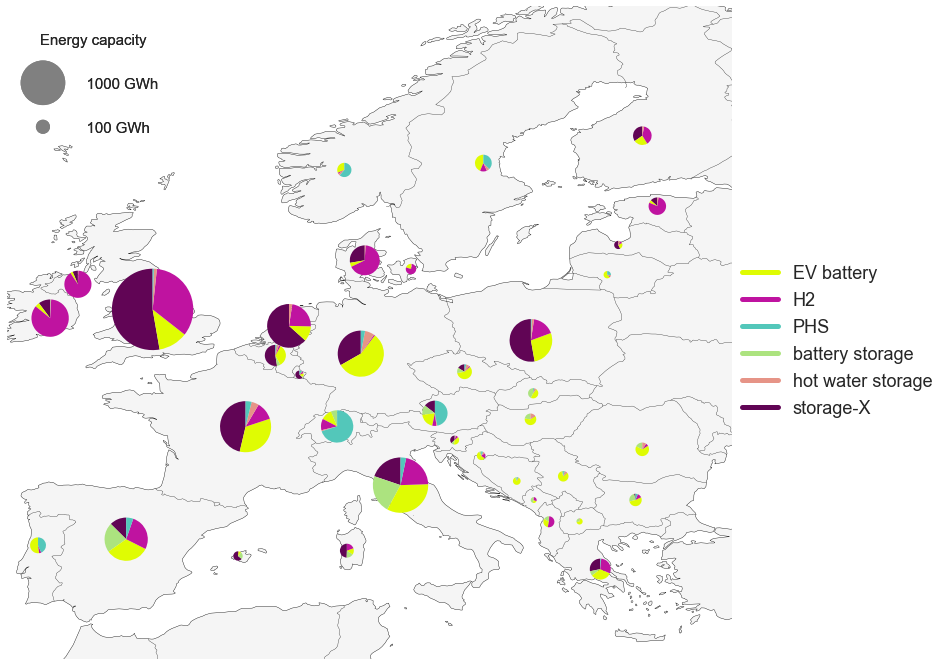

In [5]:
storage_map(networks_opt, scen='-T-H-I-B', tech_colors=tech_colors)

Import module that depicts the temporal variation of the electricity supply and consumption:

In [6]:
from scripts.Balancing_temporal_figures import temporal

To plot the temporal variation over a full year, we set 'moving_average = 8', corresponding to 24-hourly moving averaging since the resolution in the optimization is 3-hourly.

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines
dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines


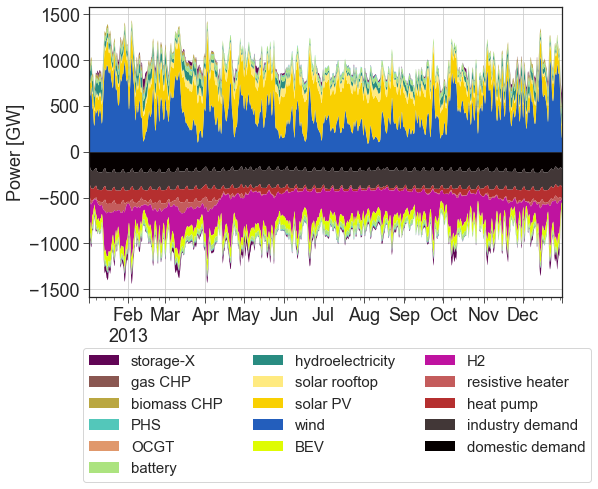

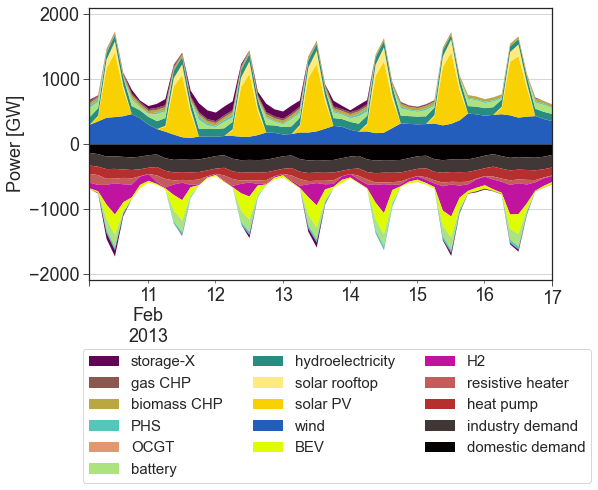

In [7]:
temporal(networks_opt, scen='-T-H-I-B', moving_average=8, tech_colors=tech_colors);

## Single-parametric sweep

The sensitivity of the output (choose between metrics such as 'E', 'lc', 'G_discharge', 'duration', and 'system_cost') to changing the storage parameters individually (i.e., single-parametric sweeep). This part is covered in section IV.A in the paper.

In [8]:
from scripts.Single_parameter_sweep_w_weather import single_parametric_sweep

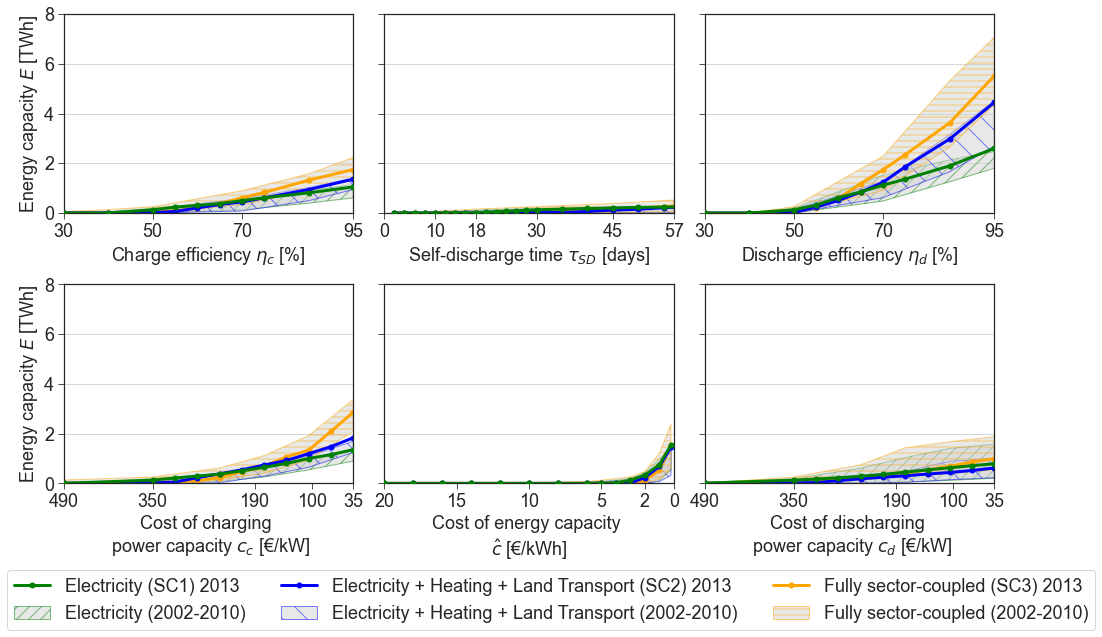

In [9]:
single_parametric_sweep(variable='E')

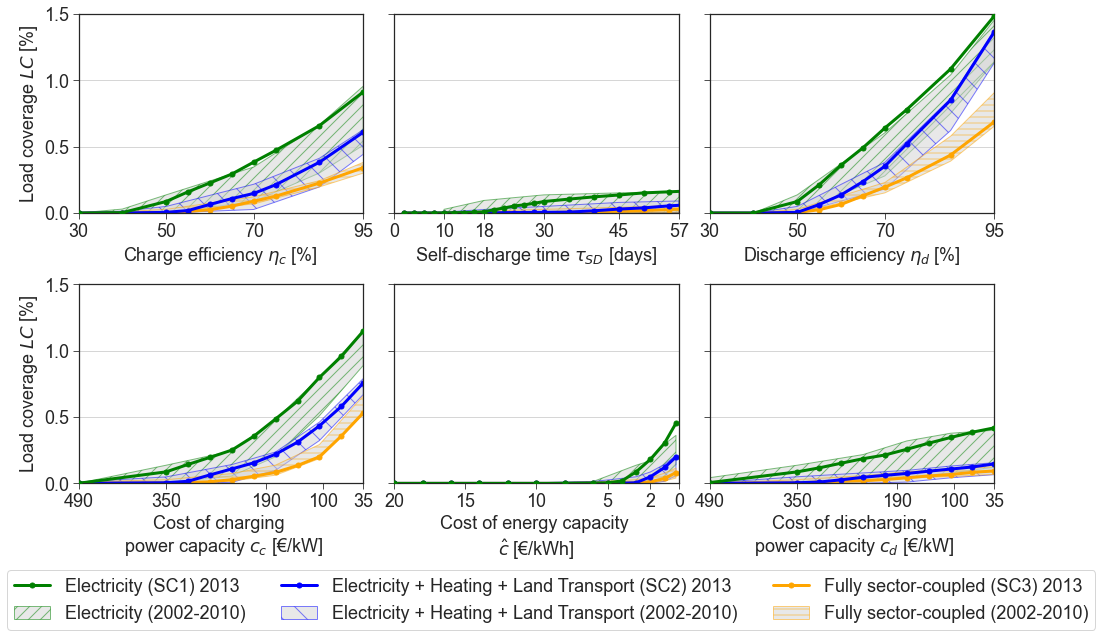

In [10]:
single_parametric_sweep(variable='lc')

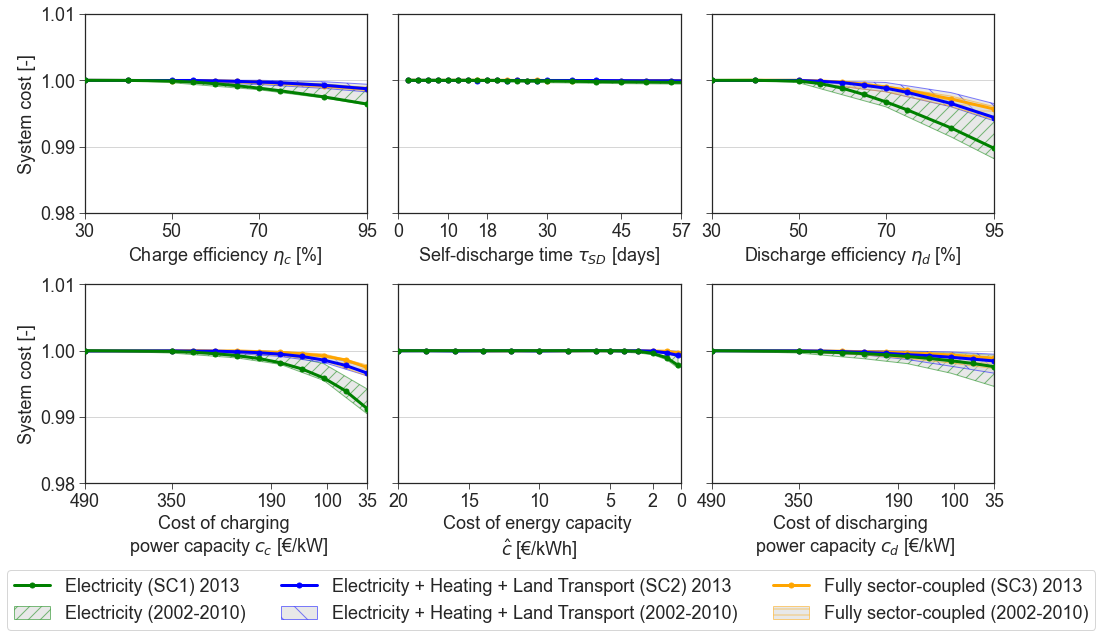

In [11]:
single_parametric_sweep(variable='system_cost')

## Spiderweb

Description 

Define lower threshold of energy capacity "threshold_E" for the storage configuration to be included. Emerging candidates can be included. Choose between:
- aCAES
- LAES
- TES
- PTES
- MSES
- RFB
- H2

Furthermore, choose between system compositions (input variable *scen*):
- '0' (SC1)
- 'T-H' (SC2)
- 'T-H-I-B' (SC3)


In [12]:
from scripts.Spiderweb import plot_spiderweb

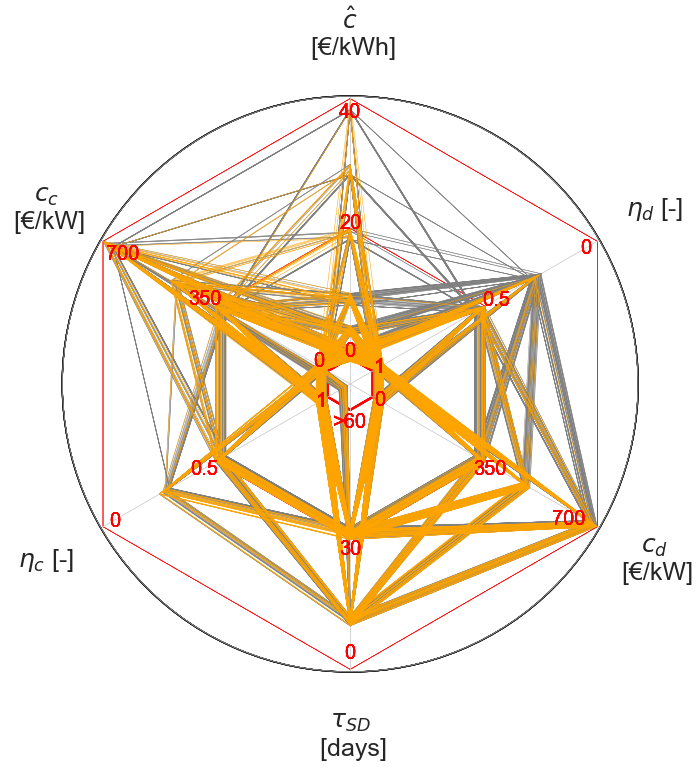

In [13]:
plot_spiderweb(scen = 'T-H-I-B', threshold_E = 2000, plot_ex = False) #, candidate = 'TES')

## Multivariable regression

Calculate the normalized coefficients by fitting a generalized linear regression model to the considering output metric. Here, demonstrated with the energy capacity "E".

- For load coverage, change the fitting variable to "LC"
- For system cost reduction, change this to "SCR"). 

In [14]:
from scripts.multivariable_regression import multivariable_regression

Sector:  
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2784.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                 2452.1
No. Observations:                3888   AIC:                            -4890.
Df Residuals:                    3881   BIC:                            -4846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6563      0.007    100.64

<Figure size 432x288 with 0 Axes>

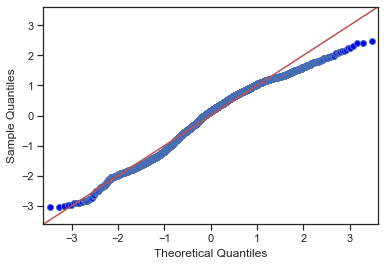

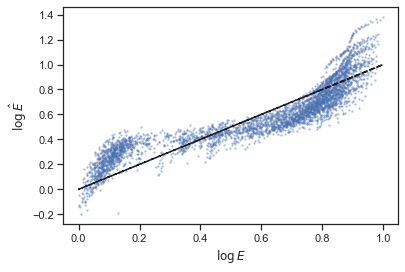

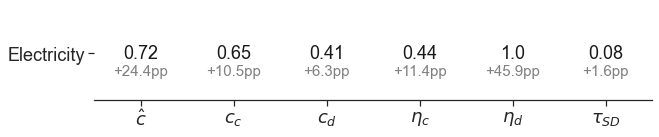

In [15]:
# Full regression model (including all six parameters as descriptors in the regression), using 3888 samples 
# (only available for the Electricity system)
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         csv_file='sspace_3888.csv',
                         print_pvals=False, 
                         colors=False, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     398.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.66e-224
Time:                        14:27:59   Log-Likelihood:                 541.71
No. Observations:                 724   AIC:                            -1069.
Df Residuals:                     717   BIC:                            -1037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4731      0.014   

<Figure size 432x288 with 0 Axes>

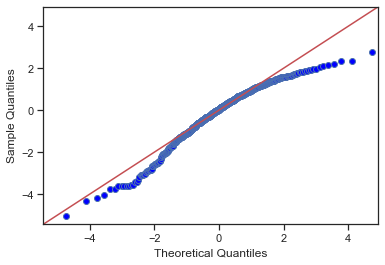

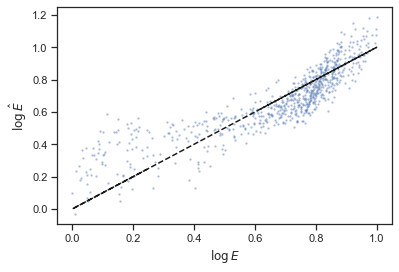

<Figure size 432x288 with 0 Axes>

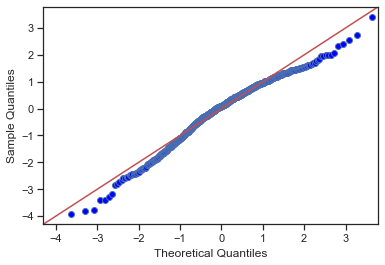

<Figure size 432x288 with 0 Axes>

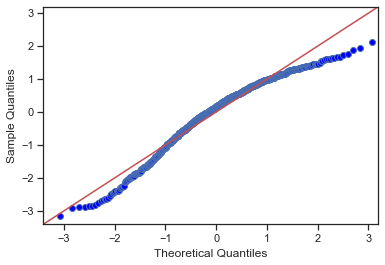

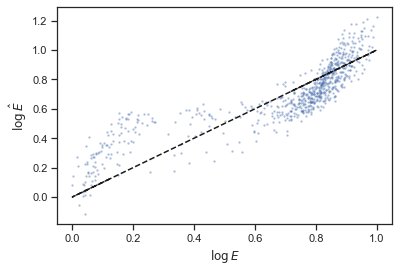

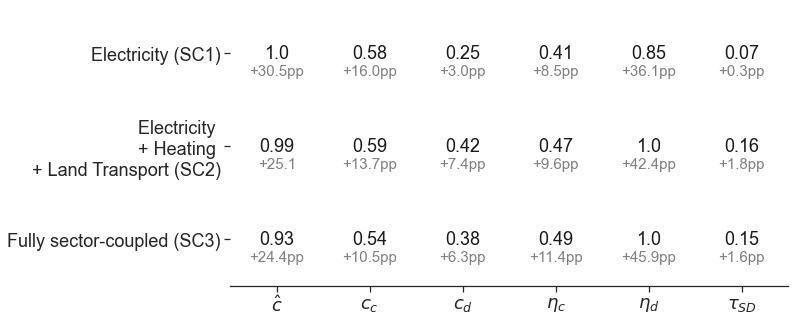

In [16]:
# Full regression model (including all six parameters as descriptors in the regression), using 724 samples
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         csv_file='sspace_w_sectorcoupling_wo_duplicates.csv',
                         print_pvals=False, 
                         colors=False, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     436.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.59e-215
Time:                        14:28:02   Log-Likelihood:                 516.39
No. Observations:                 724   AIC:                            -1021.
Df Residuals:                     718   BIC:                            -993.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5168      0.013   

<Figure size 432x288 with 0 Axes>

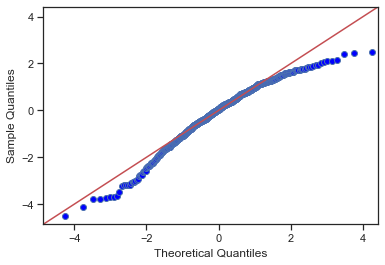

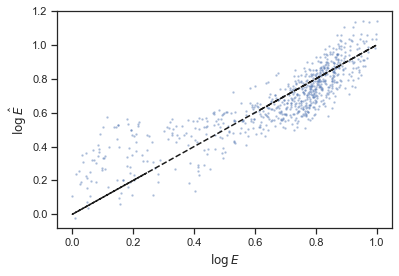

<Figure size 432x288 with 0 Axes>

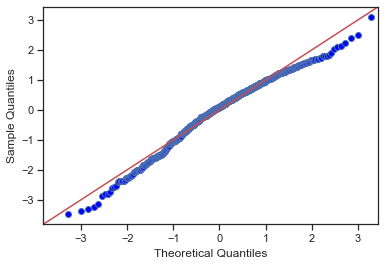

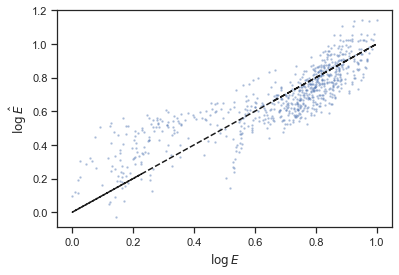

<Figure size 432x288 with 0 Axes>

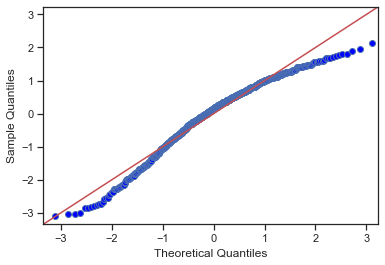

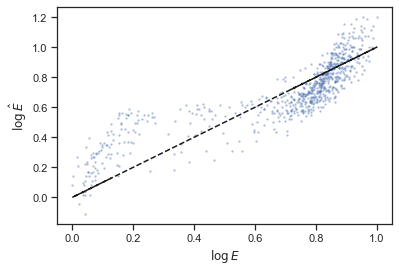

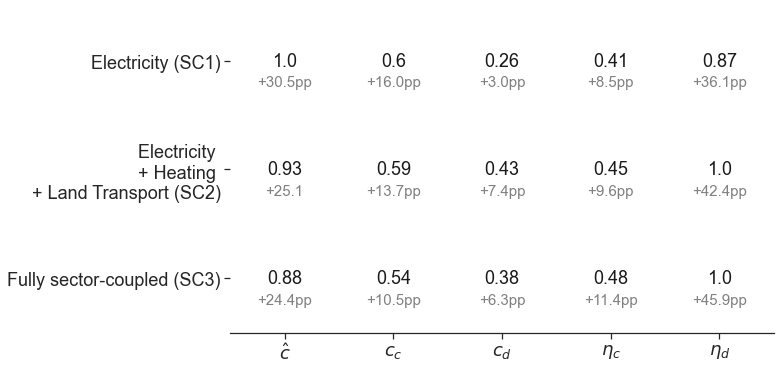

In [17]:
# Reduced regression model: Omitting 'tau_SD'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=False, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     65.44
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.62e-56
Time:                        14:28:05   Log-Likelihood:                 146.67
No. Observations:                 724   AIC:                            -281.3
Df Residuals:                     718   BIC:                            -253.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7603      0.021   

<Figure size 432x288 with 0 Axes>

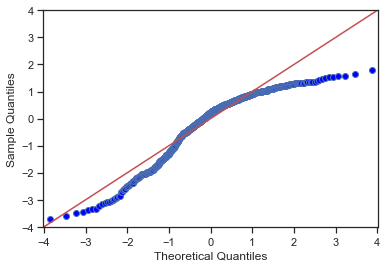

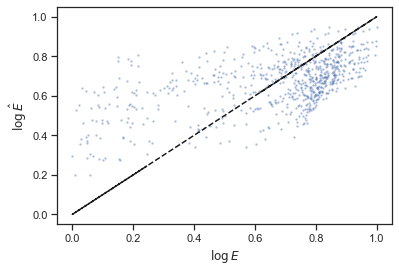

<Figure size 432x288 with 0 Axes>

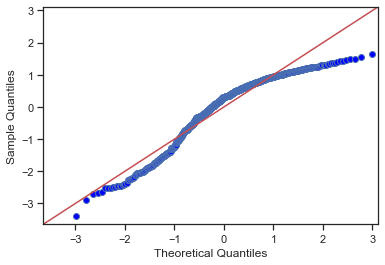

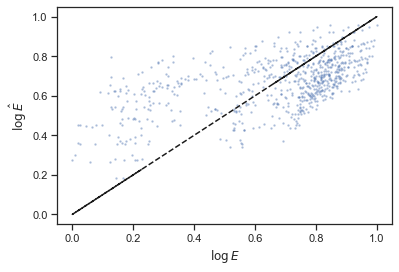

<Figure size 432x288 with 0 Axes>

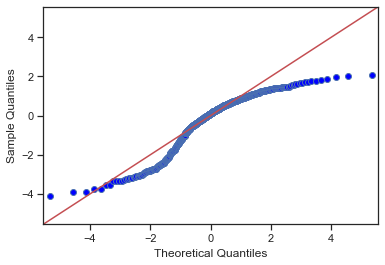

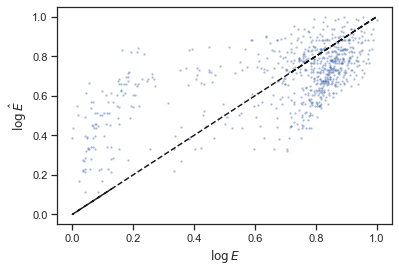

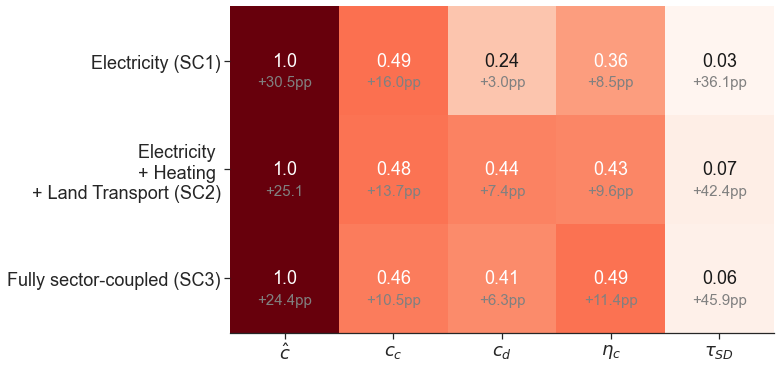

In [18]:
# Reduced regression model: Omitting 'eta2'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=True, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     271.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.98e-163
Time:                        14:28:08   Log-Likelihood:                 395.23
No. Observations:                 724   AIC:                            -778.5
Df Residuals:                     718   BIC:                            -750.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6144      0.015   

<Figure size 432x288 with 0 Axes>

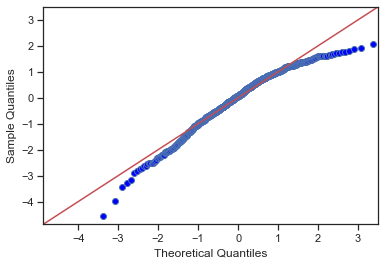

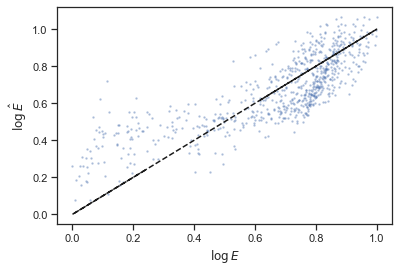

<Figure size 432x288 with 0 Axes>

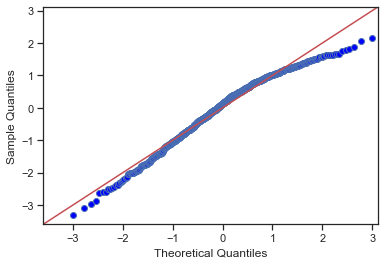

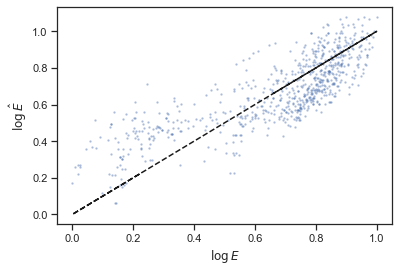

<Figure size 432x288 with 0 Axes>

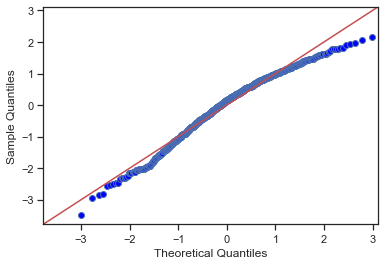

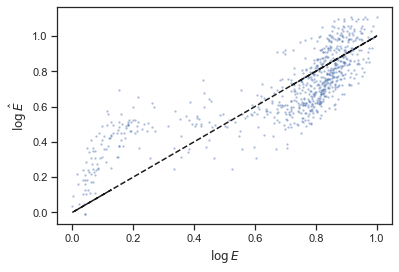

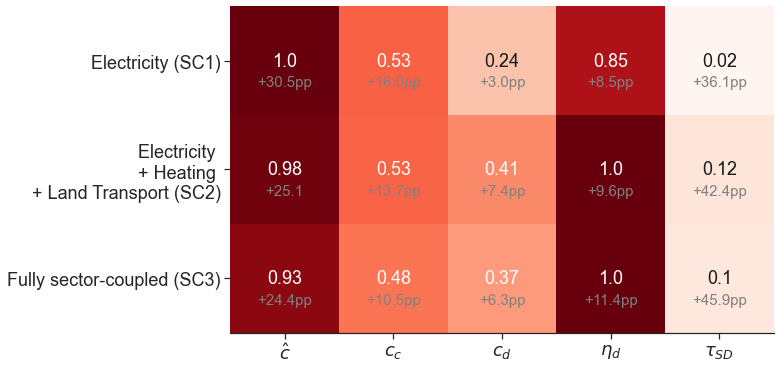

In [19]:
# Reduced regression model: Omitting 'eta1'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=True, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     344.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.00e-188
Time:                        14:28:11   Log-Likelihood:                 453.72
No. Observations:                 724   AIC:                            -895.4
Df Residuals:                     718   BIC:                            -867.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4045      0.015   

<Figure size 432x288 with 0 Axes>

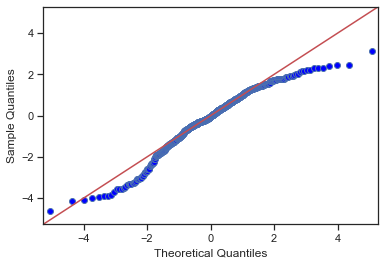

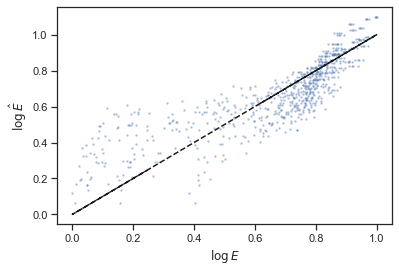

<Figure size 432x288 with 0 Axes>

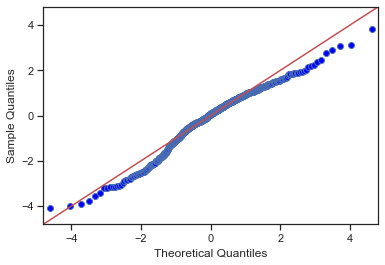

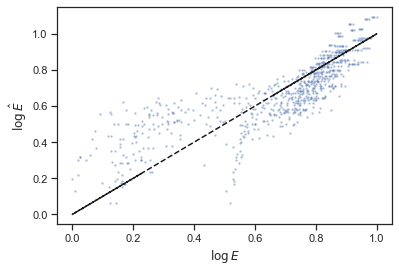

<Figure size 432x288 with 0 Axes>

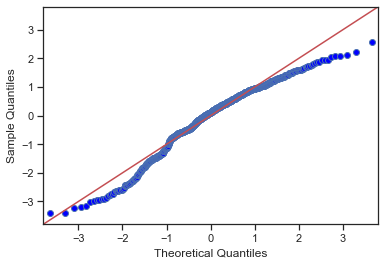

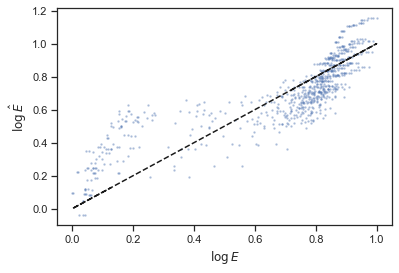

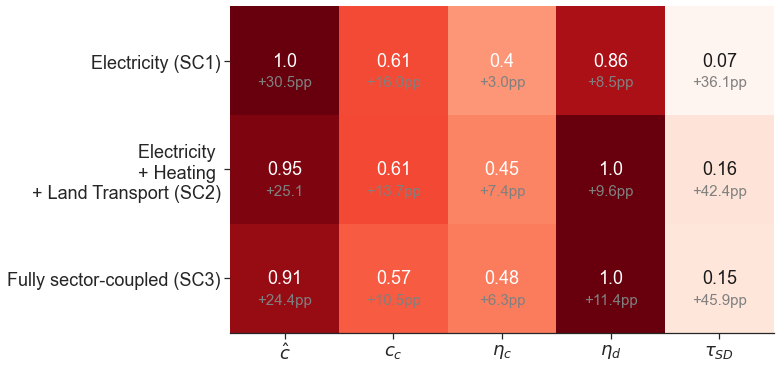

In [20]:
# Reduced regression model: Omitting 'c2'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=True, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     258.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.43e-158
Time:                        14:28:14   Log-Likelihood:                 383.67
No. Observations:                 724   AIC:                            -755.3
Df Residuals:                     718   BIC:                            -727.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4352      0.018   

<Figure size 432x288 with 0 Axes>

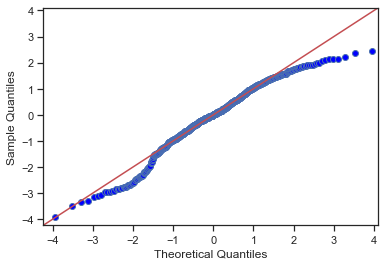

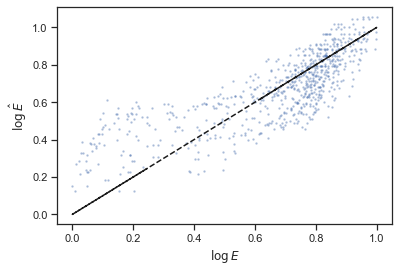

<Figure size 432x288 with 0 Axes>

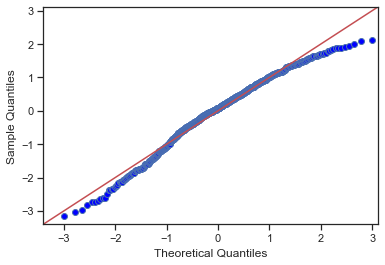

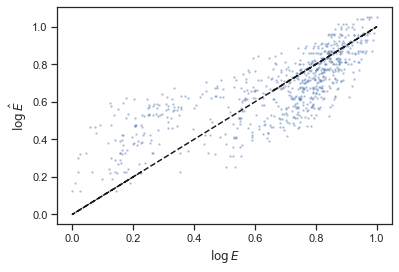

<Figure size 432x288 with 0 Axes>

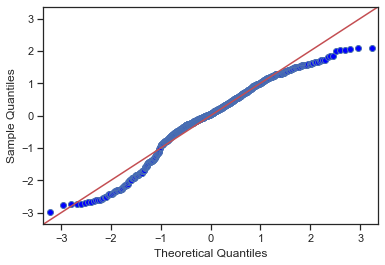

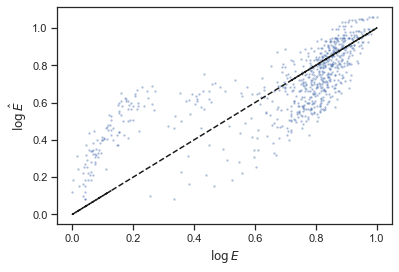

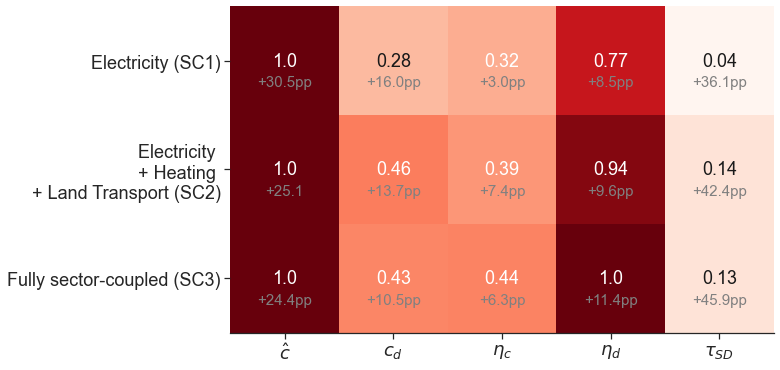

In [21]:
# Reduced regression model: Omitting 'c1'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=True, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     159.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.15e-114
Time:                        14:28:17   Log-Likelihood:                 281.43
No. Observations:                 724   AIC:                            -550.9
Df Residuals:                     718   BIC:                            -523.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4492      0.020   

<Figure size 432x288 with 0 Axes>

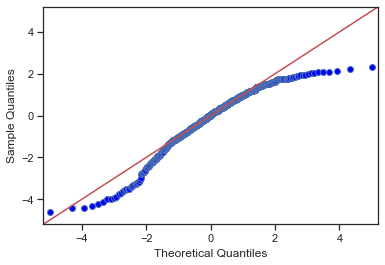

<Figure size 432x288 with 0 Axes>

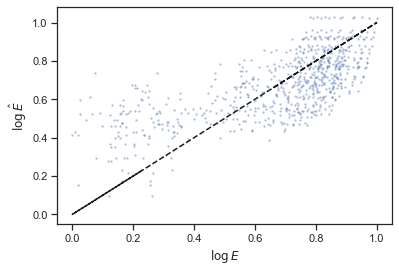

<Figure size 432x288 with 0 Axes>

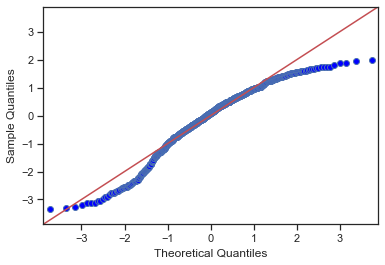

In [22]:
# Reduced regression model: Omitting 'c_hat'
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         print_pvals=False, 
                         colors=True, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

## Storage requirements matrix

In [23]:
from scripts.three_panel_figure_designspace_old import plot_2D_panels as plot_2D_panels_old

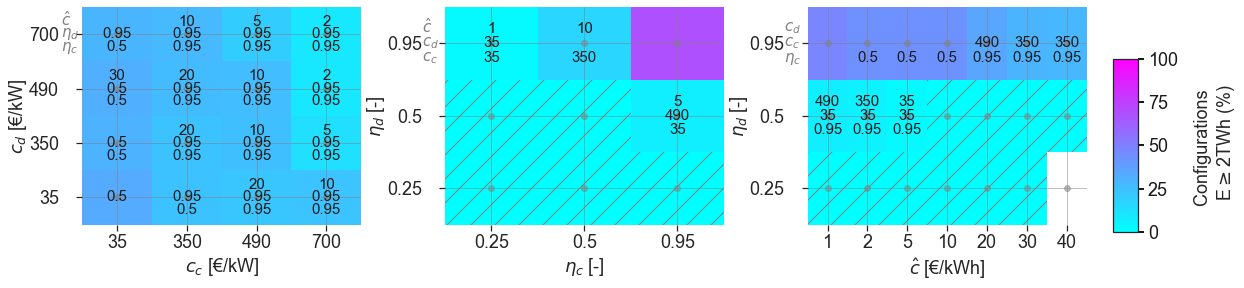

In [24]:
plot_2D_panels_old(sector='T-H-I-B', 
                   output='SCR',
                   slack=0, 
                   threshold=1, 
                   normfactor=100, 
                   color_variable='count_norm', 
                   combination=False, 
                   write_extra_indices=True, 
                   omit_charge_efficiency = True, 
                   lock_tau = False)

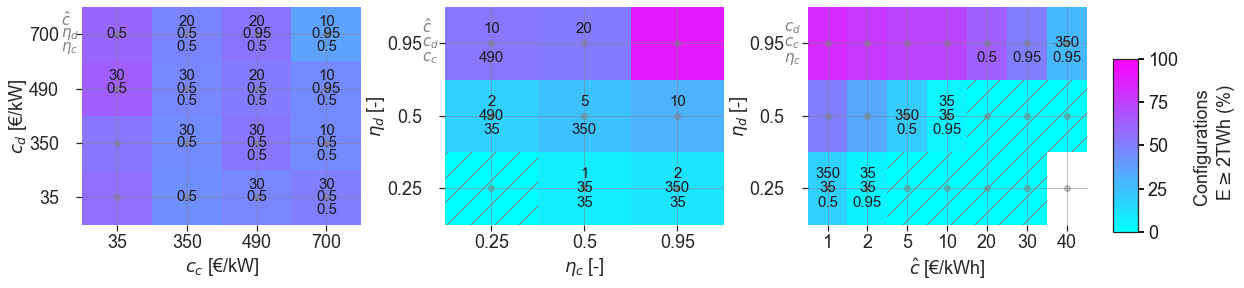

In [25]:
plot_2D_panels_old(sector='T-H-I-B', 
                   output = 'E_cor',
                   slack=100, 
                   threshold=2000, 
                   normfactor=100, 
                   color_variable='count_norm', 
                   combination=False, 
                   write_extra_indices=True, 
                   omit_charge_efficiency = True, 
                   lock_tau = False)

In [26]:
from scripts.three_panel_figure_designspace import plot_2D_panels

In [28]:
plot_2D_panels(sector='T-H-I-B', 
               slack=100, 
               threshold=2000, 
               normfactor=100, 
               color_variable='count_norm', 
               combination=False, 
               write_extra_indices=True, 
               omit_charge_efficiency = True, 
               lock_tau = False)

If the attribute 'omit_charge_efficiency = True', the charge efficiencies >1 are omitted. 
We can reproduce the figure when including such case:

In [29]:
plot_2D_panels(sector='T-H-I-B', 
               slack=100, 
               threshold=2000, 
               normfactor=100, 
               color_variable='count_norm', 
               combination=False, 
               write_extra_indices=True, 
               omit_charge_efficiency = False, 
               lock_tau = False)

## Existing techs

This section determines the model outputs when including the exact parameter values for the existing storage technologies. 

In [30]:
from scripts.read_ex_tech_nc_files import plot_existingtechs_result

Evaluating the output of the emerging storage technologies in PyPSA-Eur-Sec w. 37 nodes:

.csv file for N= 37  already exists
.csv file for N= 74  already exists


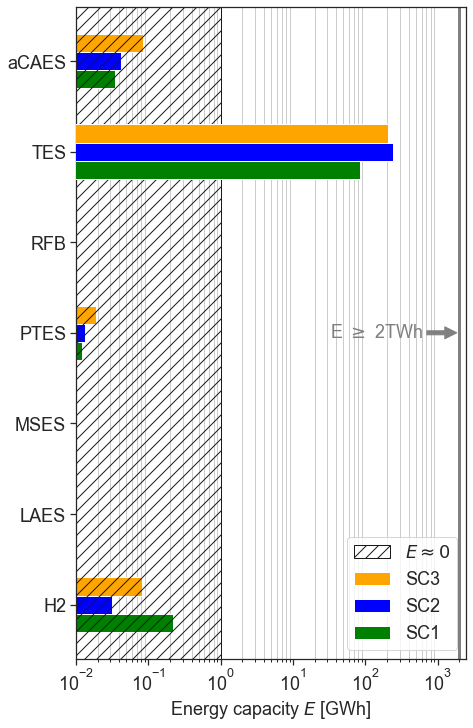

In [31]:
fig = plot_existingtechs_result(N_select='74', Ns=['37','74'])

Evaluating the output of the emerging storage technologies in PyPSA-Eur-Sec w. 74 nodes (lead to a very similar result):

.csv file for N= 37  already exists
.csv file for N= 74  already exists


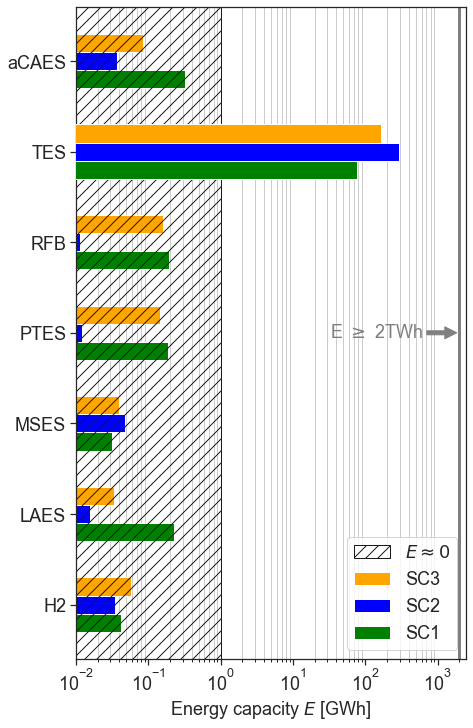

In [32]:
fig = plot_existingtechs_result(N_select='37', Ns=['37','74'])

## Plot generation mix

This part of the code visualizes the backup power and battery capacity at different levels of storage-X deployments.

In [33]:
from scripts.Generation_mix import plot_generation_mix

In [34]:
plot_generation_mix(tech_colors,sector=0)

Sector: 0
Wind: 45.7 pm 2.9
Solar: 29.2 pm 2.7
Hydro: 18.1 pm 0.6


In [35]:
plot_generation_mix(tech_colors,sector='T-H')

Sector: T-H
Wind: 47.7 pm 2.2
Solar: 32.5 pm 2.1
Hydro: 10.8 pm 0.3


Sector: T-H-I-B
Wind: 56.3 pm 1.9
Solar: 34.2 pm 2.3
Hydro: 6.4 pm 0.1


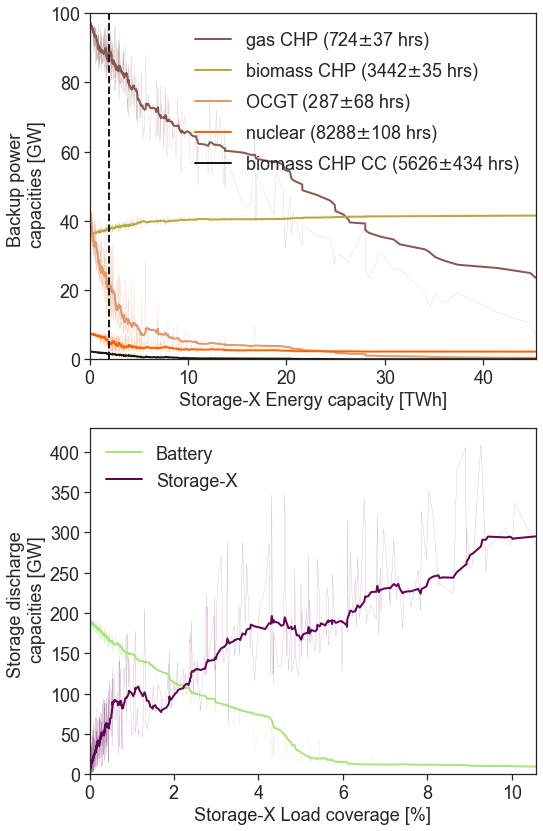

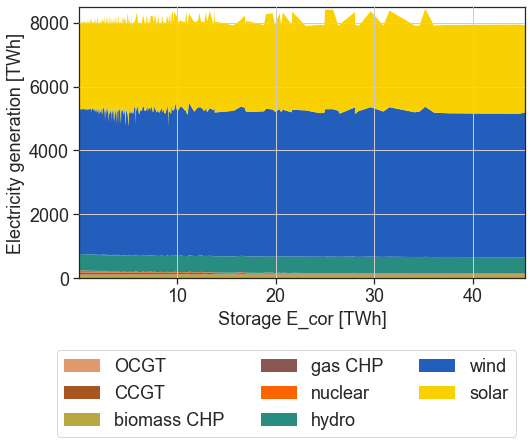

In [36]:
plot_generation_mix(tech_colors,sector='T-H-I-B')

## System cost reduction and renewable curtailment

This part investigates the total system cost and the level of renewable curtailment at different deployments of storage-X.

In [37]:
from scripts.Scatterplot import plot_scatter

c_sys [bEUR]


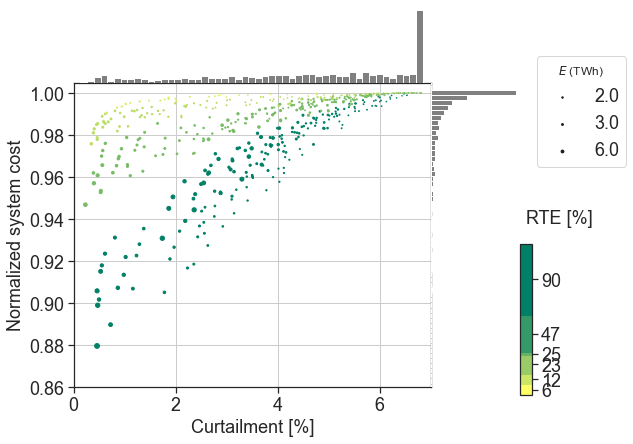

In [38]:
plot_scatter(sector=0,x='curtailment',y='c_sys [bEUR]',color_acc_to='RTE', binwidth_factor = 0.02)

In [39]:
plot_scatter(sector=0,x='curtailment',y='c_sys [bEUR]',color_acc_to='c_c', binwidth_factor = 0.02)

c_sys [bEUR]


c_sys [bEUR]


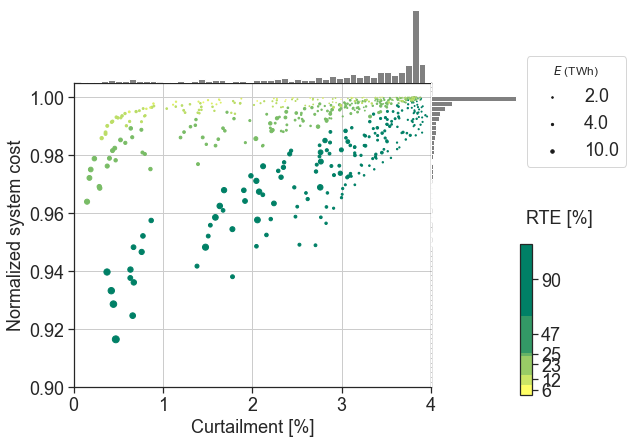

In [40]:
plot_scatter(sector='T-H',x='curtailment',y='c_sys [bEUR]',color_acc_to='RTE', binwidth_factor = 0.02)

c_sys [bEUR]


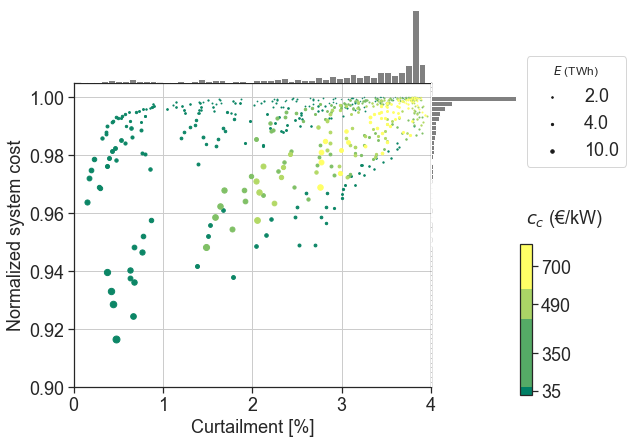

In [41]:
plot_scatter(sector='T-H',x='curtailment',y='c_sys [bEUR]',color_acc_to='c_c', binwidth_factor = 0.02)

c_sys [bEUR]


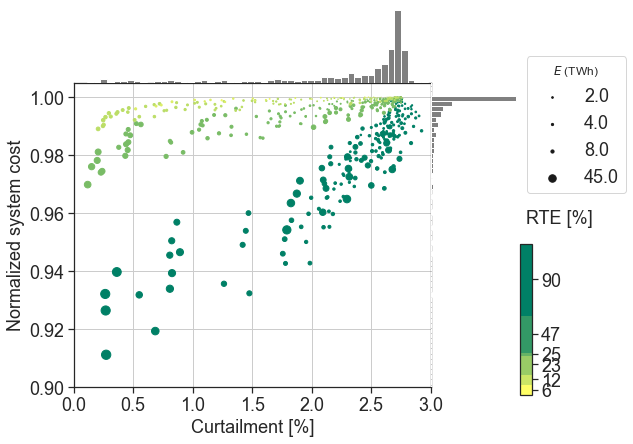

In [42]:
plot_scatter(sector='T-H-I-B',x='curtailment',y='c_sys [bEUR]',color_acc_to='RTE', binwidth_factor = 0.02)

c_sys [bEUR]


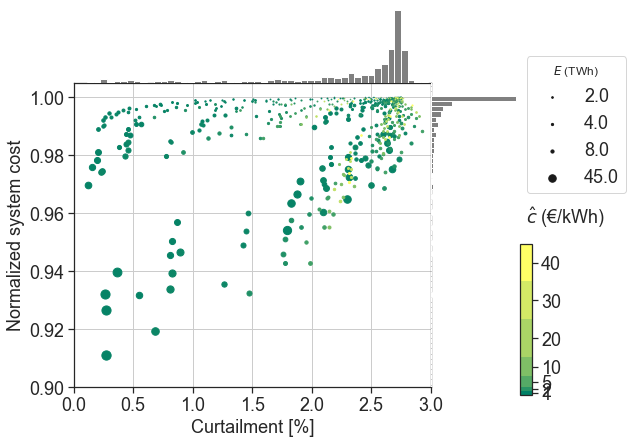

In [43]:
plot_scatter(sector='T-H-I-B',
             x='curtailment',y='c_sys [bEUR]',color_acc_to='c_hat', binwidth_factor = 0.02)

c_sys [bEUR]


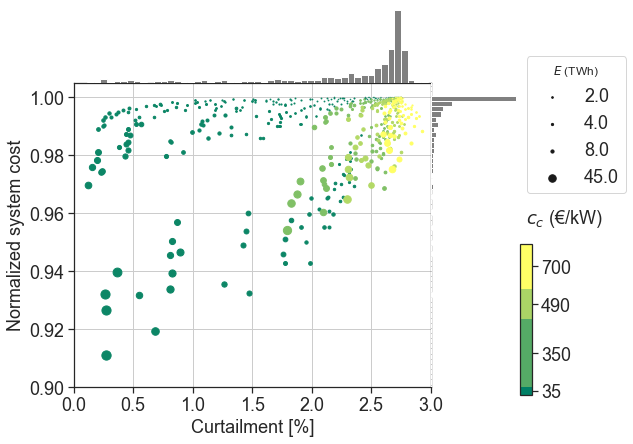

In [44]:
plot_scatter(sector='T-H-I-B',
             x='curtailment',y='c_sys [bEUR]',color_acc_to='c_c', binwidth_factor = 0.02)

c_sys [bEUR]


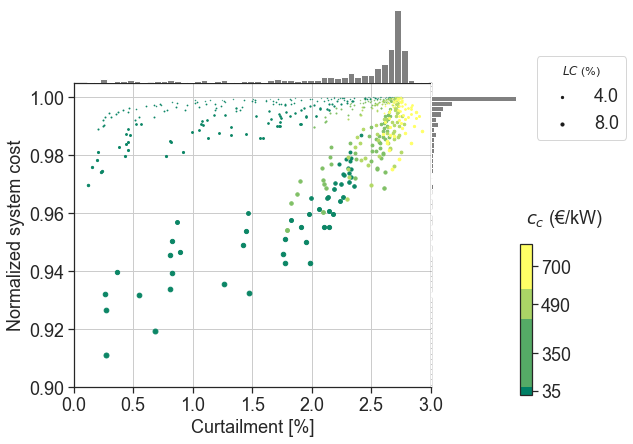

In [45]:
plot_scatter(sector='T-H-I-B',x='curtailment',y='c_sys [bEUR]',scaling='LC',
             color_acc_to='c_c', binwidth_factor = 0.02)

In [46]:
plot_scatter(sector='T-H-I-B',x='curtailment',y='c_sys [bEUR]',scaling='LC',
             color_acc_to='RTE', binwidth_factor = 0.02)

c_sys [bEUR]
